## Backpropagation Network- Handwritten Digit Recognition

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras import backend as K
from keras.utils import np_utils
from sklearn.model_selection import KFold
from tensorflow.python.keras import Sequential

### Preprocessing

In [2]:
import pandas as pd
bpn_train=pd.read_excel('DRtraining.xlsx')
bpn_train=bpn_train.drop(bpn_train.columns[0],axis=1)
bpn_train.head()

,Pixel001,Pixel002,Pixel003,Pixel004,Pixel005,Pixel006,Pixel007,Pixel008,Pixel009,Pixel010,...,Target0,Target1,Target2,Target3,Target4,Target5,Target6,Target7,Target8,Target9
0,0,0,0,0,0,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


In [3]:
bpn_train_X=bpn_train.drop(bpn_train.columns[256:266],axis=1)
bpn_train_y=bpn_train.drop(bpn_train.columns[0:256],axis=1)

In [4]:
# Reshape to be samples*pixels*width*height
bpn_train_X=bpn_train_X.to_numpy()
bpn_train_X=bpn_train_X.reshape(bpn_train_X.shape[0],256).astype('float32')

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(bpn_train_X,bpn_train_y,test_size=0.2,random_state=87)

### Compare different parameters

In [6]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import time
import numpy as np

def Experiment(layers,units,lr):
    model=Sequential()
    keras.optimizers.Adam(lr=lr)
    
    model.add(Dense(units,activation='relu',input_dim=256,kernel_initializer="uniform"))
    for i in range(layers):
        model.add(Dropout(0.1))
        model.add(Dense(units,activation='relu',input_dim=units,kernel_initializer="uniform"))
    model.add(Dense(10,input_dim=units,activation='softmax'))
    
    tStart=time.time()
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=100,verbose=0)
    tEnd=time.time()
    
    score=model.evaluate(X_test, y_test,verbose=1)
    outcome=[]
    outcome.append(score[0])
    outcome.append(score[1])
    outcome.append(tEnd-tStart)

    return outcome

10/10 [==============================] - 0s 2ms/step - loss: 1.4328 - accuracy: 0.8639


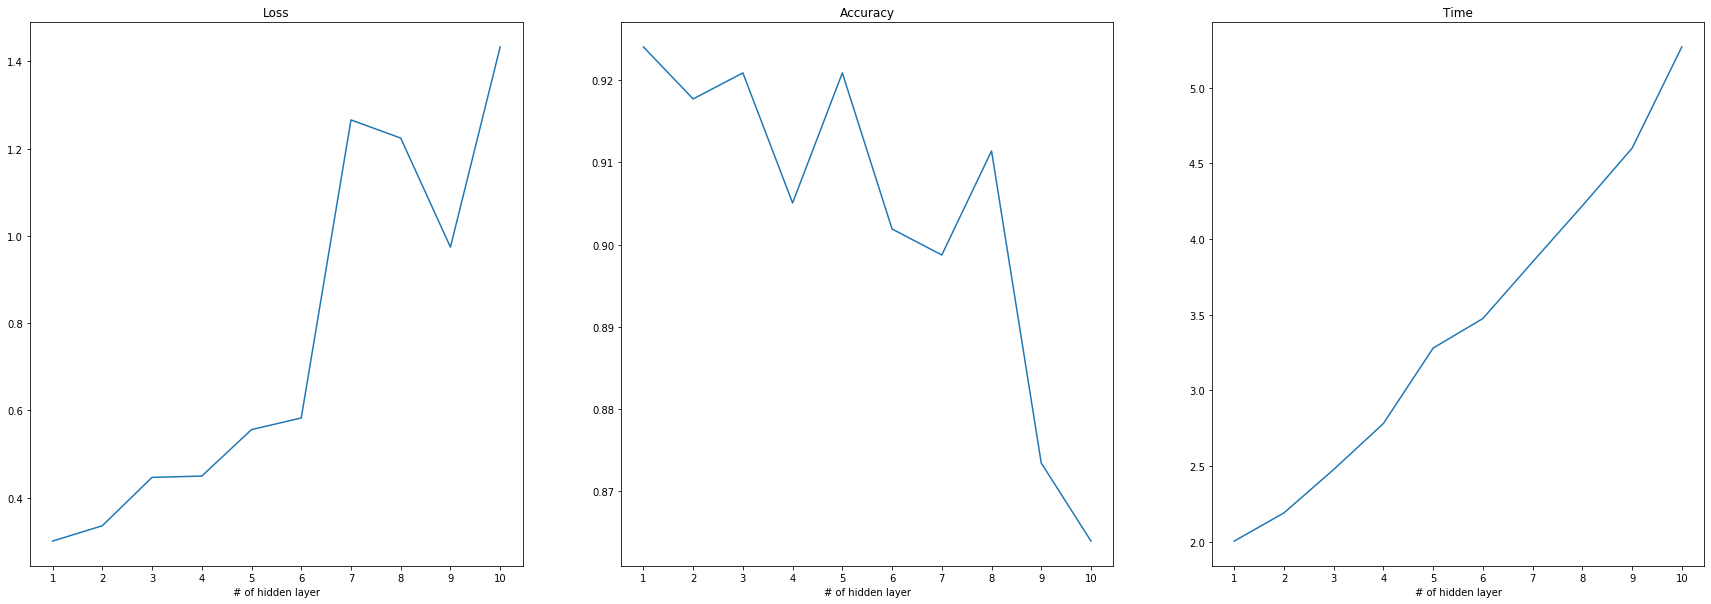

In [7]:
loss_layer=[]
accuracy_layer=[]
time_layer=[]
X_label=[]

for i in range(1,11):
    outcome=Experiment(i,256,0.025)
    loss_layer.append(outcome[0])
    accuracy_layer.append(outcome[1])
    time_layer.append(outcome[2])
    X_label.append(str(i))


plt.figure(figsize=(30,10))

plt.subplot(1,3,1)
plt.plot(X_label,loss_layer)
plt.title("Loss")
plt.xlabel('# of hidden layer')

plt.subplot(1,3,2)
plt.plot(X_label,accuracy_layer)
plt.title("Accuracy")
plt.xlabel('# of hidden layer')

plt.subplot(1,3,3)
plt.plot(X_label,time_layer)
plt.title("Time")
plt.xlabel('# of hidden layer')
plt.show()


10/10 [==============================] - 0s 798us/step - loss: 0.4408 - accuracy: 0.8987


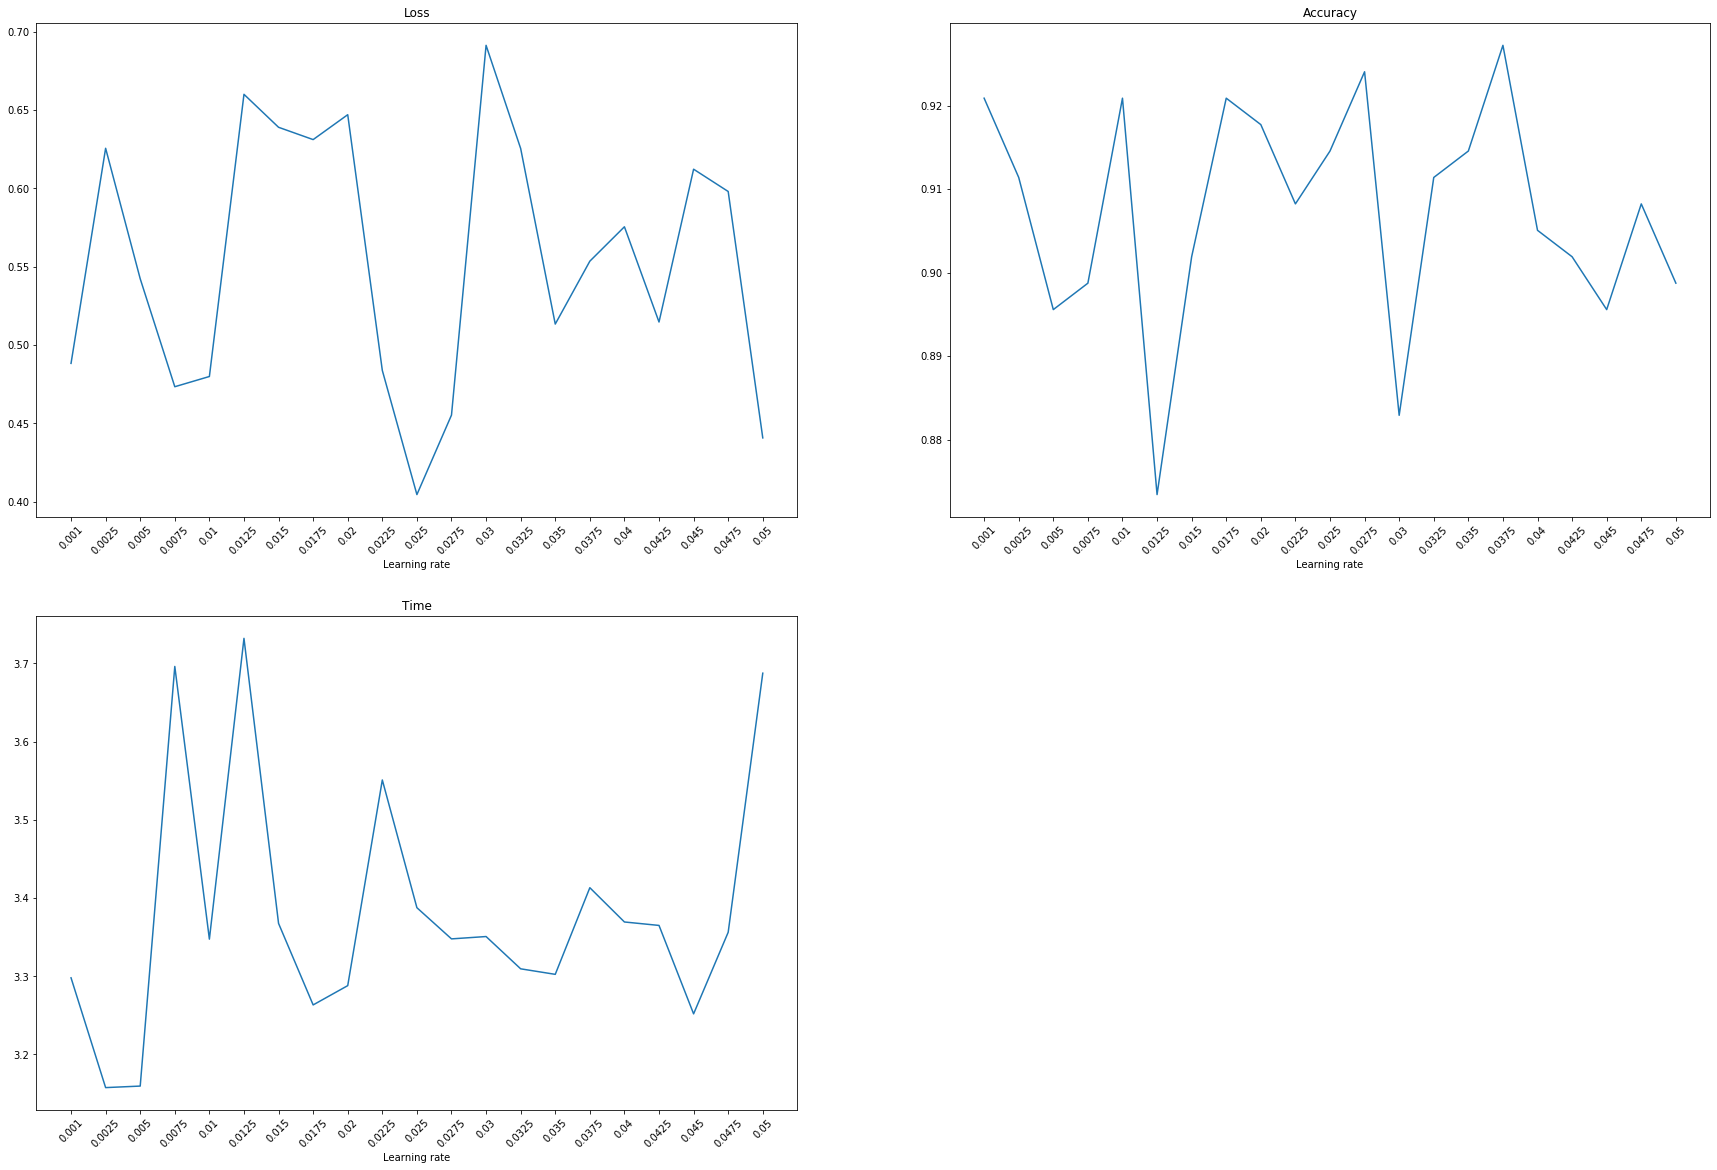

In [8]:
loss_lr=[]
accuracy_lr=[]
time_lr=[]
X_label=[]

outcome=Experiment(5,256,0.001)
loss_lr.append(outcome[0])
accuracy_lr.append(outcome[1])
time_lr.append(outcome[2])
X_label.append(0.001)

for i in range(1,21):
    outcome=Experiment(5,256,i*0.0025)
    loss_lr.append(outcome[0])
    accuracy_lr.append(outcome[1])
    time_lr.append(outcome[2])
    X_label.append(str(i*0.0025))


plt.figure(figsize=(30,20))
plt.subplot(2,2,1)
plt.plot(X_label,loss_lr)
plt.title("Loss")
plt.xlabel('Learning rate')
plt.xticks(rotation=45)

plt.subplot(2,2,2)
plt.plot(X_label,accuracy_lr)
plt.title("Accuracy")
plt.xlabel('Learning rate')
plt.xticks(rotation=45)

plt.subplot(2,2,3)
plt.plot(X_label,time_lr)
plt.title("Time")
plt.xlabel('Learning rate')
plt.xticks(rotation=45)
plt.show()


10/10 [==============================] - 0s 1ms/step - loss: 0.5327 - accuracy: 0.9272


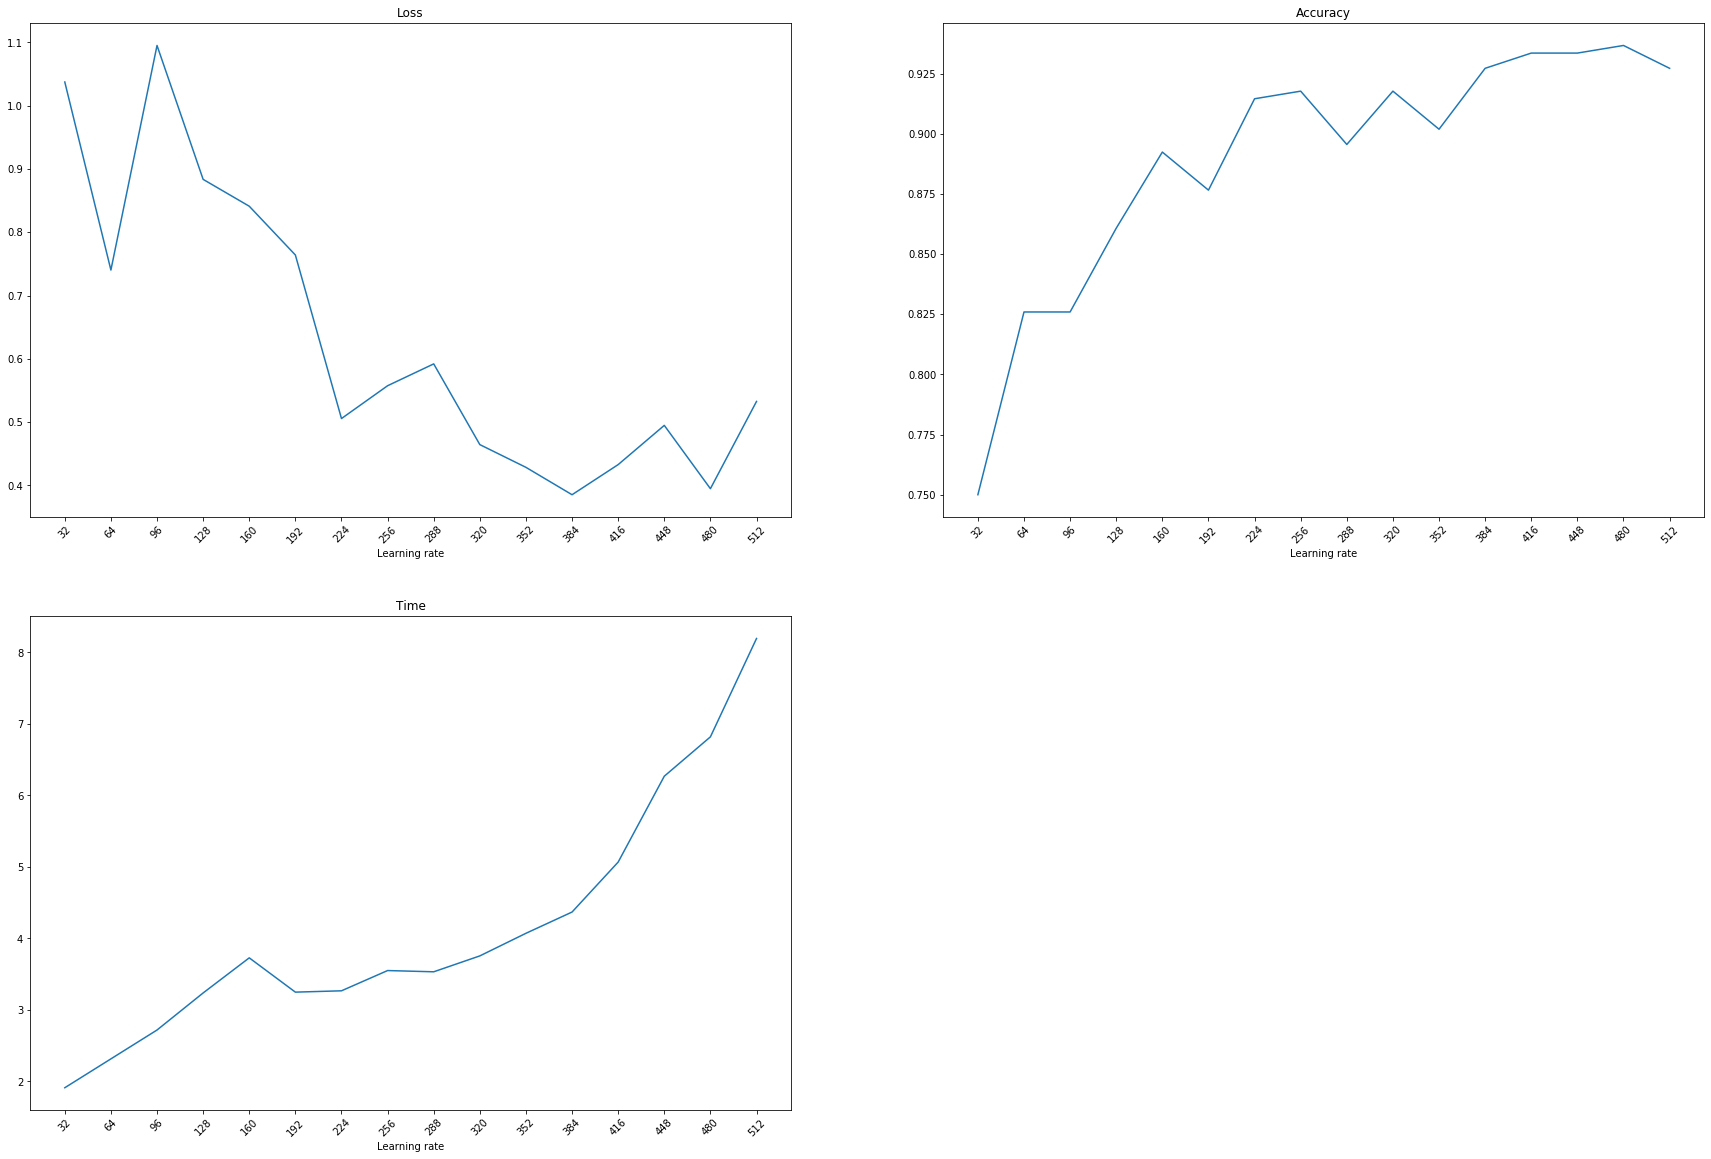

In [9]:
loss_unit=[]
accuracy_unit=[]
time_unit=[]
X_label=[]

for i in range(1,17):
    outcome=Experiment(5,32*i,0.025)
    loss_unit.append(outcome[0])
    accuracy_unit.append(outcome[1])
    time_unit.append(outcome[2])
    X_label.append(str(i*32))

plt.figure(figsize=(30,20))
plt.subplot(2,2,1)
plt.plot(X_label,loss_unit)
plt.title("Loss")
plt.xticks(rotation=45)
plt.xlabel('Learning rate')

plt.subplot(2,2,2)
plt.plot(X_label,accuracy_unit)
plt.title("Accuracy")
plt.xticks(rotation=45)
plt.xlabel('Learning rate')

plt.subplot(2,2,3)
plt.plot(X_label,time_unit)
plt.title("Time")
plt.xticks(rotation=45)
plt.xlabel('Learning rate')
plt.show()

### Build the final model

TIME: 2.826960325241089


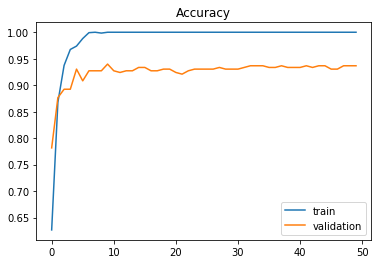

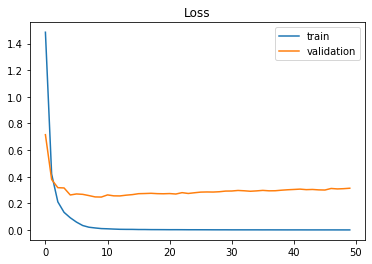

In [10]:
lr=0.0375
units=490
layers=1

model=Sequential()
keras.optimizers.Adam(lr=lr)

model.add(Dense(units,activation='relu',input_dim=256,kernel_initializer="uniform"))
for i in range(layers):
    model.add(Dropout(0.1))
    model.add(Dense(units,activation='relu',input_dim=units,kernel_initializer="uniform"))
model.add(Dense(10,input_dim=units,activation='softmax'))

tStart=time.time()
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
outcome=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=100,verbose=0)
tEnd=time.time()

#print the information about train and validation dataset (time, accuracy, loss)
print("TIME:",tEnd-tStart)

plt.plot(outcome.history['accuracy'])
plt.plot(outcome.history['val_accuracy'])
plt.title("Accuracy")
plt.legend(['train','validation'])
plt.show()

plt.plot(outcome.history['loss'])
plt.plot(outcome.history['val_loss'])
plt.title("Loss")
plt.legend(['train','validation'])
plt.show()

### Predict

In [11]:
import pandas as pd
bpn_predict=pd.read_excel('DRpredict.xlsx')
bpn_predict=bpn_predict.drop(bpn_predict.columns[0],axis=1)

bpn_predict_X=bpn_predict.drop(bpn_predict.columns[256:266],axis=1)

bpn_predict_X=bpn_predict_X.to_numpy()
bpn_predict_X=bpn_predict_X.reshape(bpn_predict_X.shape[0],256).astype('float32')


In [12]:
pred=model.predict_classes(bpn_predict_X, batch_size=1)
pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([4, 0, 5, 0, 5, 0, 5, 0, 2, 5, 7, 0, 2, 4, 7], dtype=int64)